In [200]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, SVC, OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier

In [201]:
df = pd.read_csv("hepatitis.csv")

In [202]:
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1


In [203]:
df.shape

(155, 21)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          155 non-null    int64 
 1   target      155 non-null    int64 
 2   age         155 non-null    int64 
 3   gender      155 non-null    int64 
 4   steroid     155 non-null    object
 5   antivirals  155 non-null    int64 
 6   fatigue     155 non-null    object
 7   malaise     155 non-null    object
 8   anorexia    155 non-null    object
 9   liverBig    155 non-null    object
 10  liverFirm   155 non-null    object
 11  spleen      155 non-null    object
 12  spiders     155 non-null    object
 13  ascites     155 non-null    object
 14  varices     155 non-null    object
 15  bili        155 non-null    object
 16  alk         155 non-null    object
 17  sgot        155 non-null    object
 18  albu        155 non-null    object
 19  protime     155 non-null    object
 20  histology 

In [205]:
unique_Class = df['target'].unique()
print(unique_Class)

[2 1]


In [206]:
#We need to get our data filled with a question mark as Nan.
df = df.replace('?', np.nan)

In [207]:
df.head()

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,NaN,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,NaN,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,NaN,1
3,4,2,31,1,NaN,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,NaN,200,4,NaN,1


In [208]:
df.isna().sum()

ID             0
target         0
age            0
gender         0
steroid        1
antivirals     0
fatigue        1
malaise        1
anorexia       1
liverBig      10
liverFirm     11
spleen         5
spiders        5
ascites        5
varices        5
bili           6
alk           29
sgot           4
albu          16
protime       67
histology      0
dtype: int64

In [209]:
#Let's look at the unique values ​​for our Class column.
unique_protime = df['protime'].unique()
print(unique_protime)
unique_albu = df['albu'].unique()
print(unique_albu)
unique_liverFirm = df['liverFirm'].unique()
print(unique_liverFirm)
unique_liverBig  = df['liverBig'].unique()
print(unique_liverBig )
unique_alk  = df['alk'].unique()
print(unique_alk )



[nan '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']
['4' '3.5' nan '4.4' '3.9' '3.7' '4.9' '2.9' '4.3' '4.1' '4.2' '4.7' '3.8'
 '2.7' '4.6' '5' '3.3' '4.5' '3.4' '3.1' '3' '2.6' '5.3' '4.8' '2.8' '3.6'
 '2.1' '6.4' '2.4' '2.2']
['2' '1' nan]
['1' '2' nan]
['85' '135' '96' '46' nan '95' '78' '59' '81' '57' '72' '102' '62' '53'
 '70' '48' '133' '60' '45' '175' '280' '58' '67' '194' '150' '180' '75'
 '56' '71' '74' '80' '191' '125' '110' '50' '92' '52' '26' '215' '164'
 '103' '34' '68' '82' '127' '76' '100' '55' '167' '30' '179' '141' '44'
 '165' '118' '230' '107' '40' '147' '114' '84' '123' '168' '86' '138'
 '155' '63' '256' '119' '139' '90' '160' '158' '115' '243' '181' '130'
 '166' '295' '120' '65' '109' '89' '126']


In [210]:
#Let's look at their meanings.
#pro-time= It is done to measure the level of blood clotting. its taken here as test result
#albu = Albumin is the most abundant type of protein in the blood. its taken here as test result
#alk = It is an enzyme encoded by the ALK gene. 
#Even though these are taken as objects, we need to convert them to float values.

In [211]:
df = df.drop('ID', axis=1)

In [212]:
numeric_cols = []
for col in df.columns:
    if df[col].nunique() > 3:
        numeric_cols.append(col)

print("\nColumns with more than 3 unique values ​​(numeric_cols):")
print(numeric_cols)


Columns with more than 3 unique values ​​(numeric_cols):
['age', 'bili', 'alk', 'sgot', 'albu', 'protime']


In [213]:
categoric_cols = []
for col in df.columns:
    if df[col].nunique() < 3:
        categoric_cols.append(col)

print("\nColumns with less than 3 unique values ​​(numeric_cols):")
print(categoric_cols)


Columns with less than 3 unique values ​​(numeric_cols):
['target', 'gender', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liverBig', 'liverFirm', 'spleen', 'spiders', 'ascites', 'varices', 'histology']


In [214]:
cols_to_convert = ['age', 'bili', 'alk', 'sgot', 'albu', 'protime']
# We determine the columns you want to transform.
for col in cols_to_convert:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.')
for col in cols_to_convert:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise') 
        except ValueError as e:
            print(f"Warning: '{col}' Could not convert column to numeric format. Reason: {e}")

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      155 non-null    int64  
 1   age         155 non-null    int64  
 2   gender      155 non-null    int64  
 3   steroid     154 non-null    object 
 4   antivirals  155 non-null    int64  
 5   fatigue     154 non-null    object 
 6   malaise     154 non-null    object 
 7   anorexia    154 non-null    object 
 8   liverBig    145 non-null    object 
 9   liverFirm   144 non-null    object 
 10  spleen      150 non-null    object 
 11  spiders     150 non-null    object 
 12  ascites     150 non-null    object 
 13  varices     150 non-null    object 
 14  bili        149 non-null    float64
 15  alk         126 non-null    float64
 16  sgot        151 non-null    float64
 17  albu        139 non-null    float64
 18  protime     88 non-null     float64
 19  histology   155 non-null    i

In [216]:
#We will apply label encoder to our remaining object values.

In [217]:
# # We create the LabelEncoder object.
label_encoder = LabelEncoder()

# We determine the columns of type Object.
object_cols = df.select_dtypes(include=['object']).columns

# We transform each object type column with LabelEncoder.
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      155 non-null    int64  
 1   age         155 non-null    int64  
 2   gender      155 non-null    int64  
 3   steroid     155 non-null    int64  
 4   antivirals  155 non-null    int64  
 5   fatigue     155 non-null    int64  
 6   malaise     155 non-null    int64  
 7   anorexia    155 non-null    int64  
 8   liverBig    155 non-null    int64  
 9   liverFirm   155 non-null    int64  
 10  spleen      155 non-null    int64  
 11  spiders     155 non-null    int64  
 12  ascites     155 non-null    int64  
 13  varices     155 non-null    int64  
 14  bili        149 non-null    float64
 15  alk         126 non-null    float64
 16  sgot        151 non-null    float64
 17  albu        139 non-null    float64
 18  protime     88 non-null     float64
 19  histology   155 non-null    i

In [219]:
#protime       67

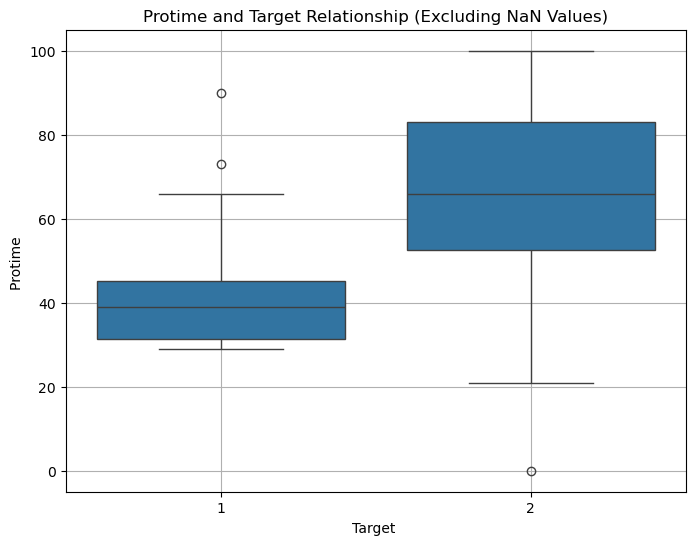

In [220]:
df_dropna = df.dropna(subset=['protime', 'target'])

plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='protime', data=df_dropna)
plt.title('Protime and Target Relationship (Excluding NaN Values)')
plt.xlabel('Target ')
plt.ylabel('Protime ')
plt.xticks([0, 1]) 
plt.grid(True)
plt.show()

In [221]:
#We will apply KNNImputer to fill in our missing data. 
#Since the KNN algorithm is based on distance  we need to apply a Standartscaler. We will also apply SVM algorithm.
#We're excluding our target column.
features_to_scale = df.drop('target', axis=1)
scaler = StandardScaler()

In [222]:
scaled_features = scaler.fit_transform(features_to_scale)

In [223]:
df_scaled_features = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=df.index)
df_scaled = pd.concat([df_scaled_features, df['target']], axis=1)
#Then we assign all of them, including the target column, to  df_scaled.

In [224]:
imputer = KNNImputer(n_neighbors=12)  

In [225]:
# We select our columns to be filled.
cols_to_impute = ['protime', 'albu', 'liverBig', 'liverFirm', 'spleen', 'alk', 'ascites', 'sgot', 'bili', 'varices', 'spiders', 'anorexia', 'malaise','fatigue', 'steroid']
df_scaled[cols_to_impute] = imputer.fit_transform(df_scaled[cols_to_impute])

In [226]:
df_scaled.head()

,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,liverFirm,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology,target
0,-0.894192,2.947457,-1.007106,0.428026,1.293924,0.773952,0.480982,-1.941451,0.528258,0.360844,0.567771,0.248282,0.223079,-0.353883,-0.396181,-0.759836,0.281486,0.702622,-0.907485,2
1,0.702579,-0.339276,-1.007106,0.428026,-0.731917,0.773952,0.480982,-1.941451,0.528258,0.360844,0.567771,0.248282,0.223079,-0.436659,0.578415,-0.491240,-0.488722,0.563396,-0.907485,2
2,2.938059,-0.339276,0.944162,0.428026,-0.731917,0.773952,0.480982,0.208013,0.528258,0.360844,0.567771,0.248282,0.223079,-0.602212,-0.181770,-0.603155,0.281486,0.515767,-0.907485,2
3,-0.814353,-0.339276,2.895431,-2.336308,1.293924,0.773952,0.480982,0.208013,0.528258,0.360844,0.567771,0.248282,0.223079,-0.602212,-1.156366,-0.379325,0.281486,0.797881,-0.907485,2
4,-0.574838,-0.339276,0.944162,0.428026,1.293924,0.773952,0.480982,0.208013,0.528258,0.360844,0.567771,0.248282,0.223079,-0.353883,-0.571608,1.277017,0.281486,0.673311,-0.907485,2


In [227]:
df_scaled.isna().sum()

age           0
gender        0
steroid       0
antivirals    0
fatigue       0
malaise       0
anorexia      0
liverBig      0
liverFirm     0
spleen        0
spiders       0
ascites       0
varices       0
bili          0
alk           0
sgot          0
albu          0
protime       0
histology     0
target        0
dtype: int64

In [228]:
print(type(df_scaled))

<class 'pandas.core.frame.DataFrame'>


In [229]:
X = df_scaled.drop('target', axis=1) 
y = df_scaled['target']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [231]:
linear_svm = LinearSVC(random_state=42, dual= False,  max_iter=1000) 
linear_svm.fit(X_train, y_train)
#We create and train our model.

# We make predictions on the test set.
y_pred_linear = linear_svm.predict(X_test)

# Let's evaluate the performance
print("Linear SVM (LinearSVC) Performance:")
print(classification_report(y_test, y_pred_linear))

Linear SVM (LinearSVC) Performance:
              precision    recall  f1-score   support

           1       0.43      0.33      0.38         9
           2       0.85      0.89      0.87        38

    accuracy                           0.79        47
   macro avg       0.64      0.61      0.62        47
weighted avg       0.77      0.79      0.78        47



In [232]:
#Non-linear SVM
#Radial Basis Function (RBF) Kernel.
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.01, 0.1, 1, 'scale', 'auto']}

#We create the GridSearchCV object.
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='accuracy',  
                           n_jobs=-1)  

# We run GridSearchCV on the training data.
grid_search.fit(X_train, y_train)

# We obtain the best hyperparameters and the best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy score: {best_score}")

# En iyi modelle test kümesi üzerinde tahmin yapın
best_rbf_svm = grid_search.best_estimator_
y_pred_best_rbf = best_rbf_svm.predict(X_test)
print("\nBest RBF SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_rbf))

Best hyperparameters: {'C': 10, 'gamma': 0.01}
Best accuracy score: 0.8982683982683982

Best RBF SVM Performance (Test Set):
              precision    recall  f1-score   support

           1       0.43      0.33      0.38         9
           2       0.85      0.89      0.87        38

    accuracy                           0.79        47
   macro avg       0.64      0.61      0.62        47
weighted avg       0.77      0.79      0.78        47



In [233]:
#Polynomial Kernel
param_grid_poly = {
    'C': [0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5], 
    'coef0': [-1, 0, 1]      # Independent term in the kernel
}
grid_search_poly = GridSearchCV(SVC(kernel='poly', random_state=42),
                               param_grid_poly,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)
grid_search_poly.fit(X_train, y_train)
best_params_poly = grid_search_poly.best_params_
best_score_poly = grid_search_poly.best_score_
print(f"\nBest Hyperparameters for Polynomial Kernel: {best_params_poly}")
print(f"Best Accuracy Score for Polynomial Kernel (Cross Validation): {best_score_poly}")


best_poly_svm = grid_search_poly.best_estimator_
y_pred_best_poly = best_poly_svm.predict(X_test)
print("\nBest Polynomial Kernel SVM Performance (Test Set):")
print(classification_report(y_test, y_pred_best_poly))


Best Hyperparameters for Polynomial Kernel: {'C': 0.1, 'coef0': 1, 'degree': 3}
Best Accuracy Score for Polynomial Kernel (Cross Validation): 0.8891774891774891

Best Polynomial Kernel SVM Performance (Test Set):
              precision    recall  f1-score   support

           1       0.40      0.22      0.29         9
           2       0.83      0.92      0.88        38

    accuracy                           0.79        47
   macro avg       0.62      0.57      0.58        47
weighted avg       0.75      0.79      0.76        47



In [234]:
#Linear Kernel
linear_kernel_svm = SVC(kernel='linear', random_state=42)
linear_kernel_svm.fit(X_train, y_train)
y_pred_linear_kernel = linear_kernel_svm.predict(X_test)
print("\nLinear SVM (SVC - Linear Kernel) Performance:")
print(classification_report(y_test, y_pred_linear_kernel))


Linear SVM (SVC - Linear Kernel) Performance:
              precision    recall  f1-score   support

           1       0.30      0.33      0.32         9
           2       0.84      0.82      0.83        38

    accuracy                           0.72        47
   macro avg       0.57      0.57      0.57        47
weighted avg       0.73      0.72      0.73        47



In [242]:
#K-Nearest Neighbors - KNN

param_grid_knn = {'n_neighbors': list(range(1, 21))}  # Number of neighbors to try

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               cv=5,  
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

best_k = grid_search_knn.best_params_['n_neighbors']
best_score_knn = grid_search_knn.best_score_

print(f"\nBest K Value (n_neighbors): {best_k}")
print(f"Best Accuracy Score (Cross Validation): {best_score_knn}")


best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
y_pred_best_knn = best_knn_model.predict(X_test)

print("\nBest KNN Model Performance (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_knn)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_knn))


Best K Value (n_neighbors): 14
Best Accuracy Score (Cross Validation): 0.8891774891774892

Best KNN Model Performance (Test Set):
Accuracy: 0.7872340425531915

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.22      0.29         9
           2       0.83      0.92      0.88        38

    accuracy                           0.79        47
   macro avg       0.62      0.57      0.58        47
weighted avg       0.75      0.79      0.76        47



In [243]:
# Random Forest 
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees to be tested
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10], # Minimum number of instances required to split a node
    'min_samples_leaf': [1, 2, 4],   
    'criterion': ['gini', 'entropy'] # Splitting criterion
}

# Looking for the Best Hyperparameters with GridSearchCV.
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                               param_grid_rf,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

#Best Hyperparameters and Score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("\nBest Random Forest Hyperparameters (Cross Validation):")
print(best_params_rf)
print(f"Best Accuracy Score (Cross Validation): {best_score_rf}")

# We Create the Model Trained with the Best Hyperparameters.
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# We make predictions on the Test Set.
y_pred_best_rf = best_rf_model.predict(X_test)

print("\nBest Random Forest Model Performance (Test Set):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))


Best Random Forest Hyperparameters (Cross Validation):
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy Score (Cross Validation): 0.9164502164502164

Best Random Forest Model Performance (Test Set):
Accuracy: 0.851063829787234

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.33      0.46         9
           2       0.86      0.97      0.91        38

    accuracy                           0.85        47
   macro avg       0.81      0.65      0.69        47
weighted avg       0.84      0.85      0.83        47

